In [1]:
import numpy as np
import pandas as pd
import os
import os.path as path
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Embedding, LSTM, GRU, Input, SpatialDropout1D,Flatten, Dropout,GlobalMaxPooling1D,Conv1D,MaxPooling1D
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer, one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.regularizers import l2
import re
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score, confusion_matrix,balanced_accuracy_score, make_scorer, precision_recall_fscore_support
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from google.colab import files

Using TensorFlow backend.


In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from google.colab import drive
drive.mount('drive')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving training_gospels.csv to training_gospels.csv


In [ ]:
df = pd.read_csv("training_gospels.csv", delimiter=',', header=None,names=['id', 't','label'])

In [ ]:
# Prepare predicted labels
df = df.iloc[1:]
Y = df.label
Y_series=pd.Series(Y,dtype='category')
Y = Y_series.cat.codes
y_prep = to_categorical(Y)
print(y_prep.shape)
print(Y_series)

(2400, 4)
1       0
2       0
3       0
4       0
5       0
       ..
2396    3
2397    3
2398    3
2399    3
2400    3
Name: label, Length: 2400, dtype: category
Categories (4, object): [0, 1, 2, 3]


In [ ]:
# Create and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.t)
vocab_size = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index
prep_data = tokenizer.texts_to_sequences(df.t)

In [ ]:
prep_data = pad_sequences(prep_data, maxlen=200,padding="post")

In [ ]:
print(len(prep_data))
print(len(Y))

2400
2400


In [ ]:
# prepare train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(prep_data, y_prep, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
def get_model(embed,dropout,neurons):
    model = Sequential()
    model.add(Embedding(vocab_size, output_dim=embed, input_length=200))
    model.add(Dropout(dropout))
    model.add(LSTM(neurons,activation='tanh',return_sequences=True,recurrent_regularizer=l2(0.01)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(4, activation='softmax'))
    optimizer=Adam(learning_rate=0.001)
    model.compile(loss='categorical_crossentropy', 
                  optimizer=optimizer,
                  metrics='categorical_accuracy')
    return model


In [ ]:
embedding1 = 128
embedding2 = 256
embedding3 = 512
dropout1 = 0.3
dropout2 = 0.5
dropout3 = 0.7
neuron1 = 32
neuron2 = 64
neuron3 = 128

In [ ]:
model1 = get_model(embedding2, dropout2, neuron1)
model2 = get_model(embedding2, dropout2, neuron2)
model3 = get_model(embedding2, dropout2, neuron3)

In [ ]:
history1 = model1.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history2 = model2.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history3 = model3.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/20
45/45 [==============================] - 3s 66ms/step - loss: 1.6069 - categorical_accuracy: 0.2618 - val_loss: 1.5190 - val_categorical_accuracy: 0.3583
Epoch 2/20
45/45 [==============================] - 3s 56ms/step - loss: 1.4500 - categorical_accuracy: 0.4160 - val_loss: 1.4034 - val_categorical_accuracy: 0.3917
Epoch 3/20
45/45 [==============================] - 2s 55ms/step - loss: 1.2654 - categorical_accuracy: 0.5160 - val_loss: 1.2661 - val_categorical_accuracy: 0.4313
Epoch 4/20
45/45 [==============================] - 3s 56ms/step - loss: 1.0676 - categorical_accuracy: 0.6062 - val_loss: 1.2314 - val_categorical_accuracy: 0.4396
Epoch 5/20
45/45 [==============================] - 3s 56ms/step - loss: 0.8868 - categorical_accuracy: 0.7104 - val_loss: 1.2592 - val_categorical_accuracy: 0.4771
Epoch 6/20
45/45 [==============================] - 3s 57ms/step - loss: 0.6942 - categorical_accuracy: 0.7854 - val_loss: 1.3135 - val_categorical_accuracy: 0.4583
Epoch 7/20

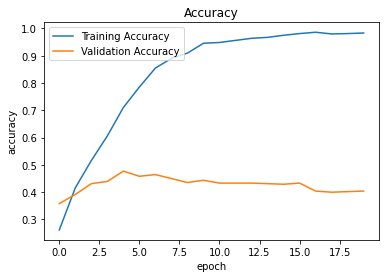

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

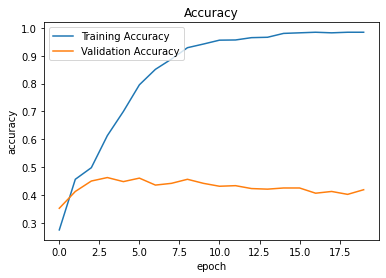

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

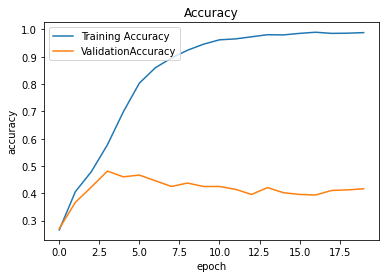

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Insert lists of accuracy obtained on the validation set
#plt.plot('acc', marker='o')
plt.plot(history1.history['categorical_accuracy'])
plt.plot(history1.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m1acc.png', dpi=600)
plt.show()
files.download("m1acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history2.history['categorical_accuracy'])
plt.plot(history2.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m2acc.png', dpi=600)
plt.show()
files.download("m2acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history3.history['categorical_accuracy'])
plt.plot(history3.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'ValidationAccuracy'], loc='upper left')
# Display the plot
plt.savefig('m3acc.png', dpi=600)
plt.show()
files.download("m3acc.png") 

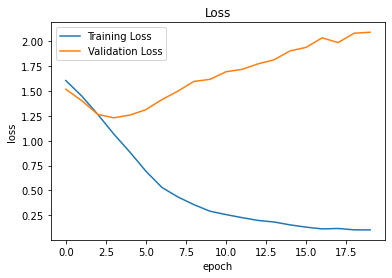

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

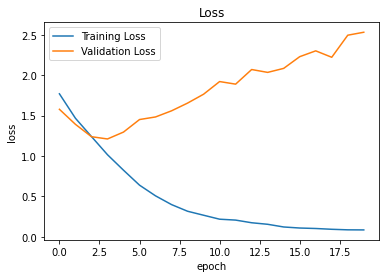

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

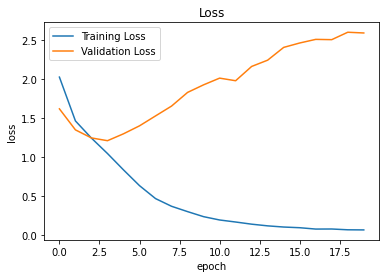

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m1loss.png', dpi=600)
plt.show()
files.download("m1loss.png") 


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m2loss.png', dpi=600)
plt.show()
files.download("m2loss.png") 


plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m3loss.png', dpi=600)
plt.show()
files.download("m3loss.png") 

In [ ]:
loss1, accuracy1 = model1.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss1, accuracy1))

loss2, accuracy2 = model2.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss2, accuracy2))

loss3, accuracy3 = model3.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss3, accuracy3))

Loss:	1.9657485485076904
Accuracy:	0.4625000059604645
Loss:	2.315660238265991
Accuracy:	0.4520833194255829
Loss:	2.381385087966919
Accuracy:	0.49166667461395264


Next session

In [ ]:
model4 = get_model(embedding1, dropout2, neuron1)
model5 = get_model(embedding2, dropout2, neuron1)
model6 = get_model(embedding3, dropout2, neuron1)

In [ ]:
history4 = model4.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history5 = model5.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history6 = model6.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/20
45/45 [==============================] - 3s 62ms/step - loss: 1.6050 - categorical_accuracy: 0.2549 - val_loss: 1.5219 - val_categorical_accuracy: 0.3604
Epoch 2/20
45/45 [==============================] - 2s 51ms/step - loss: 1.4653 - categorical_accuracy: 0.3764 - val_loss: 1.4323 - val_categorical_accuracy: 0.3500
Epoch 3/20
45/45 [==============================] - 2s 51ms/step - loss: 1.3598 - categorical_accuracy: 0.5167 - val_loss: 1.3445 - val_categorical_accuracy: 0.3708
Epoch 4/20
45/45 [==============================] - 2s 50ms/step - loss: 1.2038 - categorical_accuracy: 0.5507 - val_loss: 1.2782 - val_categorical_accuracy: 0.4042
Epoch 5/20
45/45 [==============================] - 2s 50ms/step - loss: 1.0076 - categorical_accuracy: 0.6535 - val_loss: 1.2563 - val_categorical_accuracy: 0.4479
Epoch 6/20
45/45 [==============================] - 2s 50ms/step - loss: 0.8166 - categorical_accuracy: 0.7396 - val_loss: 1.2571 - val_categorical_accuracy: 0.4708
Epoch 7/20

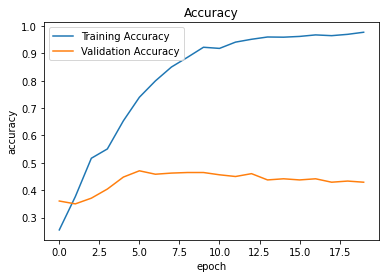

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

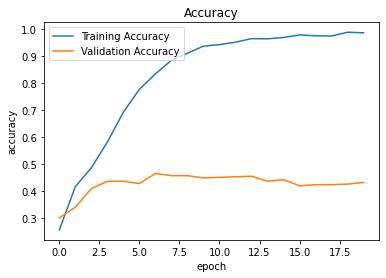

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

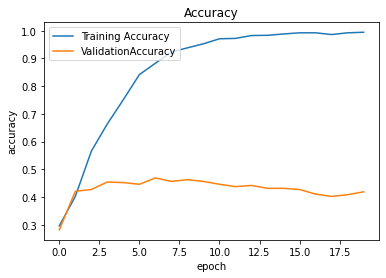

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Insert lists of accuracy obtained on the validation set
#plt.plot('acc', marker='o')
plt.plot(history4.history['categorical_accuracy'])
plt.plot(history4.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m4acc.png', dpi=600)
plt.show()
files.download("m4acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history5.history['categorical_accuracy'])
plt.plot(history5.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m5acc.png', dpi=600)
plt.show()
files.download("m5acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history6.history['categorical_accuracy'])
plt.plot(history6.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'ValidationAccuracy'], loc='upper left')
# Display the plot
plt.savefig('m6acc.png', dpi=600)
plt.show()
files.download("m6acc.png") 

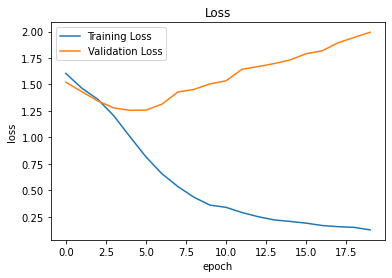

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

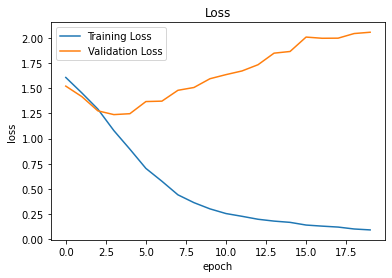

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

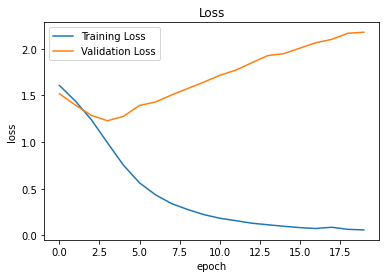

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m4loss.png', dpi=600)
plt.show()
files.download("m4loss.png") 


plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m5loss.png', dpi=600)
plt.show()
files.download("m5loss.png") 


plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m6loss.png', dpi=600)
plt.show()
files.download("m6loss.png") 

In [ ]:
loss4, accuracy4 = model4.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss4, accuracy4))

loss5, accuracy5 = model5.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss5, accuracy5))

loss6, accuracy6 = model6.evaluate(X_test,y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss6, accuracy6))

Loss:	1.8755886554718018
Accuracy:	0.45625001192092896
Loss:	2.038707971572876
Accuracy:	0.45625001192092896
Loss:	2.0873403549194336
Accuracy:	0.48124998807907104


Third sessions

In [ ]:
model7 = get_model(embedding1, dropout1, neuron1)
model8 = get_model(embedding1, dropout2, neuron1)
model9 = get_model(embedding1, dropout3, neuron1)

In [ ]:
history7 = model7.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history8 = model8.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))
history9 = model9.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val))

Epoch 1/20
45/45 [==============================] - 3s 72ms/step - loss: 1.6055 - categorical_accuracy: 0.2861 - val_loss: 1.5235 - val_categorical_accuracy: 0.3021
Epoch 2/20
45/45 [==============================] - 2s 50ms/step - loss: 1.4604 - categorical_accuracy: 0.3549 - val_loss: 1.4257 - val_categorical_accuracy: 0.3562
Epoch 3/20
45/45 [==============================] - 2s 50ms/step - loss: 1.3265 - categorical_accuracy: 0.5181 - val_loss: 1.3366 - val_categorical_accuracy: 0.4167
Epoch 4/20
45/45 [==============================] - 2s 50ms/step - loss: 1.2305 - categorical_accuracy: 0.5049 - val_loss: 1.3738 - val_categorical_accuracy: 0.3187
Epoch 5/20
45/45 [==============================] - 2s 50ms/step - loss: 1.1833 - categorical_accuracy: 0.5826 - val_loss: 1.2867 - val_categorical_accuracy: 0.4313
Epoch 6/20
45/45 [==============================] - 2s 50ms/step - loss: 1.0749 - categorical_accuracy: 0.7035 - val_loss: 1.2592 - val_categorical_accuracy: 0.4500
Epoch 7/20

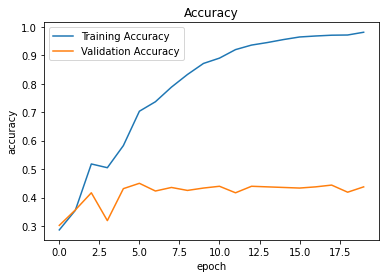

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

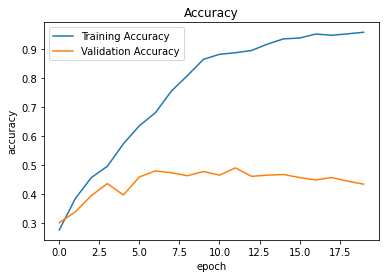

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

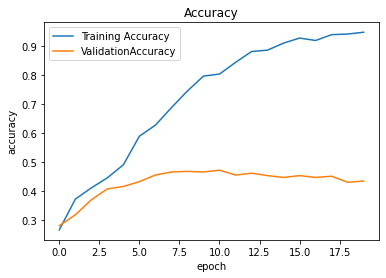

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Insert lists of accuracy obtained on the validation set
#plt.plot('acc', marker='o')
plt.plot(history7.history['categorical_accuracy'])
plt.plot(history7.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m7acc.png', dpi=600)
plt.show()
files.download("m7acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history8.history['categorical_accuracy'])
plt.plot(history8.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('m8acc.png', dpi=600)
plt.show()
files.download("m8acc.png") 


#plt.plot('acc', marker='o')
plt.plot(history9.history['categorical_accuracy'])
plt.plot(history9.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'ValidationAccuracy'], loc='upper left')
# Display the plot
plt.savefig('m9acc.png', dpi=600)
plt.show()
files.download("m9acc.png") 

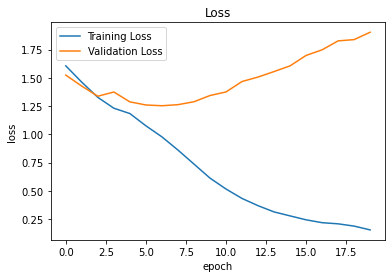

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

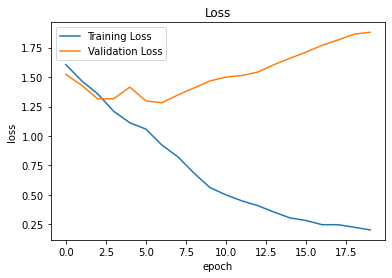

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

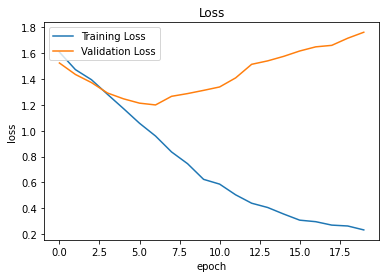

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m7loss.png', dpi=600)
plt.show()
files.download("m7loss.png") 


plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m8loss.png', dpi=600)
plt.show()
files.download("m8loss.png") 


plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('m9loss.png', dpi=600)
plt.show()
files.download("m9loss.png") 

In [ ]:
loss7, accuracy7 = model7.evaluate(X_test, y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss7, accuracy7))

loss8, accuracy8 = model8.evaluate(X_test, y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss8, accuracy8))

loss9, accuracy9 = model9.evaluate(X_test, y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss9, accuracy9))

Loss:	1.8217629194259644
Accuracy:	0.4541666805744171
Loss:	1.8989198207855225
Accuracy:	0.4749999940395355
Loss:	1.6855958700180054
Accuracy:	0.49166667461395264


FINAL ANALYSIS

In [3]:
from google.colab import files
uploaded = files.upload()

Saving all_gospels.csv to all_gospels.csv


In [4]:
df = pd.read_csv("all_gospels.csv", delimiter=',', header=None,names=['id', 't','label'])

In [5]:
# Prepare predicted labels
df = df.iloc[1:]
Y = df.label
Y_series=pd.Series(Y,dtype='category')
Y = Y_series.cat.codes
y_prep = to_categorical(Y)
print(y_prep.shape)
print(Y_series)

(3779, 4)
1       0
2       0
3       0
4       0
5       0
       ..
3775    3
3776    3
3777    3
3778    3
3779    3
Name: label, Length: 3779, dtype: category
Categories (4, object): [0, 1, 2, 3]


In [6]:
print(df.t.str.len().max())
print(df.t.str.len().min())
print(df.t.str.len().mean())

569
10
108.18629267001852


In [ ]:
# Create and fit tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df.t)
vocab_size = len(tokenizer.word_index) + 1
word_index = tokenizer.word_index
prep_data = tokenizer.texts_to_sequences(df.t)

In [ ]:
prep_data = pad_sequences(prep_data, maxlen=200,padding="post")

In [ ]:
print(len(prep_data))
print(len(Y))

3779
3779


In [ ]:
# prepare train, test and validation data
X_train, X_test, y_train, y_test = train_test_split(prep_data, y_prep, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [ ]:
model_final = get_model(embedding1,dropout3,neuron1)

In [ ]:
class_weight = dict()
class_weight[0] = 1.1 #  Matthew 1071
class_weight[1] = 1.7 # Mark 678
class_weight[2] = 1 # Luke 1151
class_weight[3] = 1.3 # John 879

history_final = model_final.fit(X_train, y_train, epochs=20,batch_size=32,validation_data=(X_val,y_val),class_weight=class_weight)

Epoch 1/20
71/71 [==============================] - 4s 60ms/step - loss: 1.8746 - categorical_accuracy: 0.2558 - val_loss: 1.4680 - val_categorical_accuracy: 0.3889
Epoch 2/20
71/71 [==============================] - 3s 46ms/step - loss: 1.7305 - categorical_accuracy: 0.3758 - val_loss: 1.3919 - val_categorical_accuracy: 0.4180
Epoch 3/20
71/71 [==============================] - 3s 46ms/step - loss: 1.6253 - categorical_accuracy: 0.4667 - val_loss: 1.2855 - val_categorical_accuracy: 0.4325
Epoch 4/20
71/71 [==============================] - 3s 46ms/step - loss: 1.4614 - categorical_accuracy: 0.5139 - val_loss: 1.1965 - val_categorical_accuracy: 0.4669
Epoch 5/20
71/71 [==============================] - 3s 47ms/step - loss: 1.2714 - categorical_accuracy: 0.5999 - val_loss: 1.1468 - val_categorical_accuracy: 0.4868
Epoch 6/20
71/71 [==============================] - 3s 48ms/step - loss: 1.1274 - categorical_accuracy: 0.6498 - val_loss: 1.1547 - val_categorical_accuracy: 0.4815
Epoch 7/20

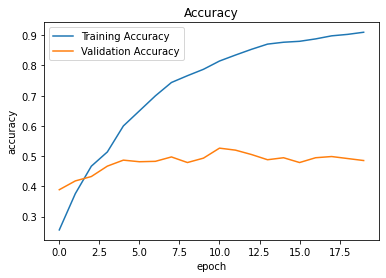

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Insert lists of accuracy obtained on the validation set
#plt.plot('acc', marker='o')
plt.plot(history_final.history['categorical_accuracy'])
plt.plot(history_final.history['val_categorical_accuracy'])
# Add extra descriptions to plot
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='upper left')
# Display the plot
plt.savefig('mfinalacc.png', dpi=600)
plt.show()
files.download("mfinalacc.png") 

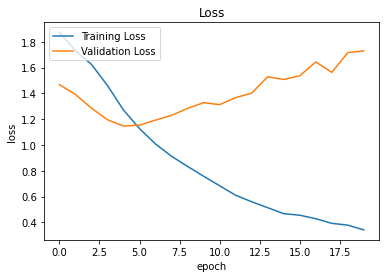

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
# Add extra descriptions to plot
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training Loss','Validation Loss'], loc='upper left')
# Display the plot
plt.savefig('mfinalloss.png', dpi=600)
plt.show()
files.download("mfinalloss.png") 

In [ ]:
loss_final, accuracy_final = model_final.evaluate(X_test, y_test, verbose=0)
print("Loss:\t{0}\nAccuracy:\t{1}".format(loss_final, accuracy_final))

Loss:	1.7583768367767334
Accuracy:	0.4761904776096344


In [ ]:
predicted = model_final.predict(X_test)
# see the predicted
print(predicted)   

[[0.926845   0.05854229 0.01074918 0.00386355]
 [0.0311796  0.10588551 0.03394867 0.82898617]
 [0.891815   0.01102365 0.02718211 0.06997929]
 ...
 [0.01687947 0.01391816 0.00529613 0.9639062 ]
 [0.06049759 0.51743084 0.41315913 0.00891245]
 [0.06971344 0.18628323 0.73506373 0.00893964]]


In [ ]:
# changing the format of y_preds and y_tests to make the assessment of the network
idx = np.argmax(predicted, axis=-1)
y_preds= np.zeros(predicted.shape )
y_preds[np.arange(predicted.shape[0]), idx] = 1

print(y_preds)

[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


In [ ]:
idx = np.argmax(y_test, axis=-1)
y_tests= np.zeros(y_test.shape )
y_tests[np.arange(y_test.shape[0]), idx] = 1

print(y_tests)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [ ]:
# Create the performance report
print(classification_report(y_tests, y_preds))

              precision    recall  f1-score   support

           0       0.44      0.44      0.44       229
           1       0.30      0.35      0.32       140
           2       0.48      0.41      0.44       212
           3       0.67      0.71      0.69       175

   micro avg       0.48      0.48      0.48       756
   macro avg       0.47      0.48      0.47       756
weighted avg       0.48      0.48      0.48       756
 samples avg       0.48      0.48      0.48       756

